# R version of ML Reserving - 2025-06-05 (work in progress)

<a target="_blank" href="https://colab.research.google.com/github/Techtonique/mlreserving/blob/main/mlreserving/demo/2025_06_05_ml_reserving_R_version.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!pip install mlreserving --verbose

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R

install.packages("reticulate")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
      development origin values
1        1981   1981   5012
2        1982   1982    106
3        1983   1983   3410
4        1984   1984   5655
5        1985   1985   1092
6        1986   1986   1513
   development origin values
50        1988   1981  18608
51        1989   1982  16169
52        1990   1983  23466
53        1989   1981  18662
54        1990   1982  16704
55        1990   1981  18834
   development  origin  values
0         1981    1981 5012.00
1         1982    1982  106.00
2         1983    1983 3410.00
3         1984    1984 5655.00
4         1985    1985 1092.00
    development  origin   values
50         1989    1982 16169.00
51         1990    1983 23466.00
52         1989    1981 18662.00
53         1990    1982 16704.00
54         1990    1981 18834.00
DescribeResult(mean=ori

Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



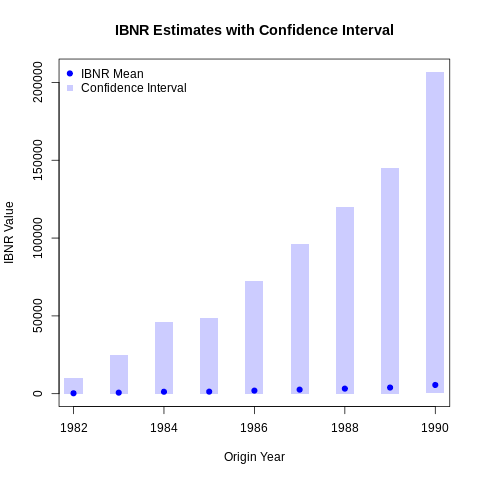

In [4]:
%%R

library(reticulate)
library(ggplot2)
library(dplyr)

# Import Python modules
pd <- import("pandas")
np <- import("numpy")
plt <- import("matplotlib.pyplot")
MLReserving <- import("mlreserving")$MLReserving
RidgeCV <- import("sklearn.linear_model")$RidgeCV
ExtraTreesRegressor <- import("sklearn.ensemble")$ExtraTreesRegressor
RandomForestRegressor <- import("sklearn.ensemble")$RandomForestRegressor

# Load the dataset
url <- "https://raw.githubusercontent.com/Techtonique/datasets/refs/heads/main/tabular/triangle/raa.csv"
df <- pd$read_csv(url)

# Print head and tail
print(head(df))
print(tail(df))

library(reticulate)
library(ggplot2)
library(dplyr)

# Import Python modules with convert=FALSE for more control
pd <- import("pandas", convert=FALSE)
np <- import("numpy", convert=FALSE)
MLReserving <- import("mlreserving", convert=FALSE)$MLReserving
RidgeCV <- import("sklearn.linear_model", convert=FALSE)$RidgeCV
ExtraTreesRegressor <- import("sklearn.ensemble", convert=FALSE)$ExtraTreesRegressor
RandomForestRegressor <- import("sklearn.ensemble", convert=FALSE)$RandomForestRegressor

# Load the dataset and convert to Python object
url <- "https://raw.githubusercontent.com/Techtonique/datasets/refs/heads/main/tabular/triangle/raa.csv"
py_df <- pd$read_csv(url)

# Print head and tail
print(py_df$head())
print(py_df$tail())

# Create models list
mdl <- RandomForestRegressor()

# Helper function to create Python integers
py_int <- function(x) {
  floor(x)
}

# Initialize the model with explicit Python integers
model <- MLReserving(
  model = mdl,
  level = py_int(95),  # 95% confidence level
  random_state = py_int(42)
)

# Fit the model
model$fit(
  py_df,
  origin_col = "origin",
  development_col = "development",
  value_col = "values"
)

# Uncomment to make predictions
result <- model$predict()
print(result)

ibnr <- model$get_ibnr()

(mean_df <- py_to_r(ibnr$mean))
(lower_df <- py_to_r(ibnr$lower))
(upper_df <- py_to_r(ibnr$upper))

mean_vals <- mean_df
lower_vals <- lower_df
upper_vals <- upper_df

# Get origin years as numeric values
years <- as.numeric(names(mean_vals))

# Set up plot
plot(years, mean_vals,
     ylim = range(c(lower_vals, upper_vals)),
     xlab = "Origin Year", ylab = "IBNR Value",
     main = "IBNR Estimates with Confidence Interval",
     pch = 19, col = "blue", type = "n")

# Add polygons and lines
for (i in seq_along(years)) {
  # Coordinates for polygon: x and y pairs for upper and lower bounds
  x_poly <- c(years[i] - 0.2, years[i] + 0.2, years[i] + 0.2, years[i] - 0.2)
  y_poly <- c(lower_vals[i], lower_vals[i], upper_vals[i], upper_vals[i])

  polygon(x_poly, y_poly, col = rgb(0, 0, 1, 0.2), border = NA)

  # Draw the mean point on top
  points(years[i], mean_vals[i], pch = 19, col = "blue")
}

# Optional: Add a legend
legend("topleft", legend = c("IBNR Mean", "Confidence Interval"),
       col = c("blue", rgb(0, 0, 1, 0.2)), pch = c(19, 15), bty = "n")